## Support Vector Machines - Explaining Hyper Parameters

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508,8.583,0
1,4.126,3.073,1
2,6.428,6.370,0
3,3.673,4.905,1
4,1.580,2.441,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


### Separating Hyperplane Manually

(<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>,)

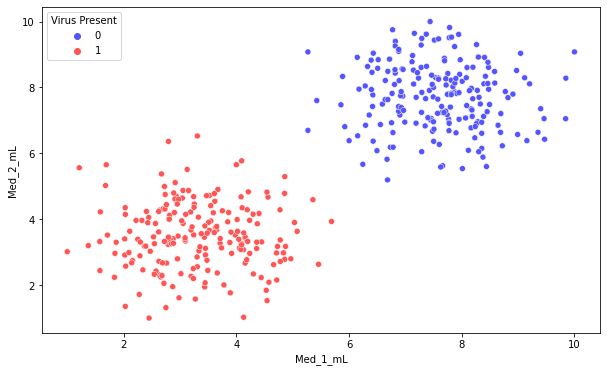

In [5]:
sns.scatterplot(x="Med_1_mL", y="Med_2_mL", hue="Virus Present", data=df, palette="seismic"),

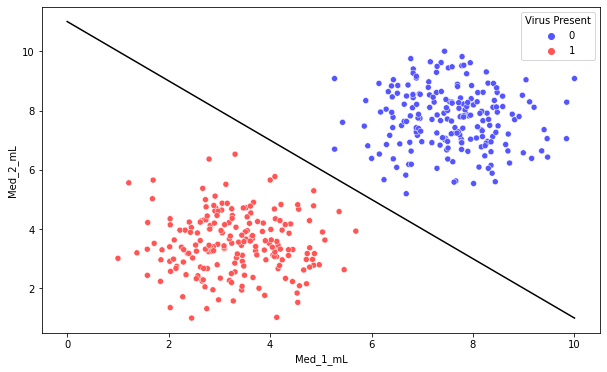

In [7]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, palette='seismic')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'black')

### SVM - Support Vector Machine

In [9]:
from sklearn.svm import SVC

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

### Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

### Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".